In [256]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup

In [ ]:
 Restauran_ID - убрать параметр - так как он как будто повторяет ранкинг)

In [ ]:
Город - 
1) разбить на dummy переменные 
2) добавить соц и экономич параметры - уровень счастью и колво туристов 


In [ ]:
заполнить пропуски - локальной наприммер? 


кухни - 

restaurants1 = restaurants.explode('Cuisine')
restaurants1['Cuisine'].unique()

Кухня - 

Европейская - 
Интернациональная - 
Азиатская -
Средиземноморскя - 
Южноамериканская - 
Североамериканская - 
Арабская - 
Африканская - 


Особые - 6 признака новых 

Веганство
здоровая - (healthy + безглютеновая)
Алко
Фасфуд
локал  - есть в ресторане или нет 
колличество кухонь


In [ ]:
Ranking - переделать привести к общей норме.


In [ ]:
Rating - (ввести взвешивающий коэффициент по колличеству обзоров ?)

In [ ]:
Price Range - 
расширить напарсив

In [ ]:
по количеству обзоров взять больше 5 как более достоверные 
убрать не у которых нет обзоров - 

сказать что у него только 1 - тоесть самый низшее количество возможных \. 

In [ ]:
Reviws - Дата последнего обзора. 

In [510]:
df = pd.read_csv('main_task.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [38]:
restaurants[restaurants.City == 'Paris']

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
28,id_10057,Paris,NaN,10059.0,4.5,NaN,4.0,"[['Fab Food'], ['08/20/2011']]",/Restaurant_Review-g187147-d2040769-Reviews-Le...,d2040769
38,id_11291,Paris,['French'],11293.0,4.5,$$ - $$$,10.0,[['A relaxing dinner in a very personal atmos....,/Restaurant_Review-g187147-d3543081-Reviews-La...,d3543081
41,id_5459,Paris,"['Asian', 'Thai', 'Vegetarian Friendly']",5460.0,3.5,$$ - $$$,132.0,[['Very good Thai Food but small Portions and....,/Restaurant_Review-g187147-d953033-Reviews-Cha...,d953033
43,id_9924,Paris,['Pub'],9926.0,3.5,$,39.0,"[['English pub', 'Shameful'], ['02/14/2017', '...",/Restaurant_Review-g187147-d5799345-Reviews-Th...,d5799345
...,...,...,...,...,...,...,...,...,...,...
39967,id_1153,Paris,"['French', 'European', 'Gastropub', 'Vegetaria...",1154.0,4.5,$$ - $$$,98.0,[['Cozy bistro with great food and warm servi....,/Restaurant_Review-g187147-d10311013-Reviews-L...,d10311013
39991,id_6655,Paris,"['French', 'Contemporary', 'Fusion', 'Gastropub']",6656.0,5.0,$$ - $$$,5.0,"[[], []]",/Restaurant_Review-g187147-d13224611-Reviews-L...,d13224611
39993,id_6057,Paris,NaN,6058.0,4.0,NaN,16.0,"[['Naught but VERY nice', 'Yum'], ['01/23/2017...",/Restaurant_Review-g187147-d10532509-Reviews-B...,d10532509
39994,id_7074,Paris,"['French', 'Fast Food', 'Mediterranean', 'Heal...",7075.0,4.5,$$ - $$$,6.0,"[[], []]",/Restaurant_Review-g187147-d12621988-Reviews-C...,d12621988


In [40]:
restaurants['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [42]:
restaurants['Cuisine Style']

31

In [125]:
restaurants = pd.read_csv('main_task.csv')

def cousine_corr(string):
    if string == 'nan':
        return string
    a = string.split(',')
    a = list(map(lambda x: x.replace("'", ""), a))
    a = list(map(lambda x: x.replace("[", ""), a))
    a = list(map(lambda x: x.replace("]", ""), a))
    a = list(map(lambda x: x.replace(" ", ""), a))
    return a
    


restaurants['Cuisine'] = restaurants['Cuisine Style'].apply(lambda x: cousine_corr(str(x)))
#restaurants = restaurants.explode('Cuisine')
#restaurants['Cuisine'].value_counts()

In [126]:
restaurants.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Cuisine
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[European, French, International]"
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,[nan]
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[Japanese, Sushi, Asian, Grill, VegetarianFrie..."
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,[nan]
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[German, CentralEuropean, VegetarianFriendly]"


In [227]:
restaurants['num_of_cousine'] = restaurants['Cuisine'].apply(lambda x: len(x))
restaurants['num_of_cousine'].mean()

KeyError: 'Cuisine'

In [132]:
restaurants1 = restaurants.explode('Cuisine')
restaurants1['Cuisine'].unique()

Кухня - 

Европейская - 
Интернациональная - 
Азиатская -
Средиземноморскя - 
Южноамериканская - 
Североамериканская - 
Арабская - 
Африканская - 


Особые - 6 признака новых 

Веганство
здоровая - (healthy + безглютеновая)
Алко
Фасфуд
локал  - есть в ресторане или нет 
колличество кухонь







array(['European', 'French', 'International', 'nan', 'Japanese', 'Sushi',
       'Asian', 'Grill', 'VegetarianFriendly', 'VeganOptions',
       'GlutenFreeOptions', 'German', 'CentralEuropean', 'Italian',
       'Pizza', 'FastFood', 'Mediterranean', 'Spanish', 'Healthy', 'Cafe',
       'Thai', 'Vietnamese', 'Bar', 'Pub', 'Chinese', 'British', 'Polish',
       'Fusion', 'Dutch', 'Mexican', 'Venezuelan', 'SouthAmerican',
       'Soups', 'Belgian', 'Steakhouse', 'Latin', 'Barbecue',
       'Argentinean', 'Irish', 'Seafood', 'Swiss', 'Portuguese',
       'Contemporary', 'WineBar', 'Greek', 'CentralAmerican', 'Indian',
       'MiddleEastern', 'Turkish', 'Hungarian', 'Pakistani', 'Peruvian',
       'Delicatessen', 'EasternEuropean', 'Swedish', 'Scandinavian',
       'Tibetan', 'Nepali', 'Korean', 'Southwestern', 'Czech', 'American',
       'Slovenian', 'Balti', 'StreetFood', 'Diner', 'BrewPub',
       'Caribbean', 'Austrian', 'Moroccan', 'Halal', 'Lebanese',
       'Russian', 'African', 'Eth

In [133]:
restaurants = pd.read_csv('main_task.csv')
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [147]:
restaurants[restaurants.City == 'Paris']['Ranking'].max()

13986.0

In [153]:
b = restaurants['City'].unique()
list(b).index('Paris')

0

In [154]:
a = list(map(lambda x: restaurants[restaurants.City == x]['Ranking'].max(), b))
a[list(b).index('Paris')]

13986.0

In [171]:
#сделать параметр Ranking более логичным

b = restaurants['City'].unique()
#list(b).index('Paris')

a = list(map(lambda x: restaurants[restaurants.City == x]['Ranking'].max(), b))
#a[list(b).index('Paris')]

restaurants['max_num_rest'] = restaurants['City'].apply(lambda x: a[list(b).index(x)])
restaurants['new_ranking'] = restaurants['Ranking']/restaurants['max_num_rest']
restaurants.head(40)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,max_num_rest,new_ranking
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,13986.0,0.398255
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2464.0,0.623782
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,16444.0,0.021467
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,6372.0,0.542687
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2763.0,0.224756
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,1484.0,0.956199
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504,6275.0,0.274422
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765,889.0,0.929134
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029,3444.0,0.781649
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681,5946.0,0.708039


In [166]:
restaurants[restaurants['Number of Reviews'] > 5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      31354 non-null  object 
 1   City               31354 non-null  object 
 2   Cuisine Style      26543 non-null  object 
 3   Ranking            31354 non-null  float64
 4   Rating             31354 non-null  float64
 5   Price Range        24508 non-null  object 
 6   Number of Reviews  31354 non-null  float64
 7   Reviews            31354 non-null  object 
 8   URL_TA             31354 non-null  object 
 9   ID_TA              31354 non-null  object 
 10  max_num_rest       31354 non-null  float64
 11  new_ranking        31354 non-null  float64
dtypes: float64(5), object(7)
memory usage: 3.1+ MB


In [170]:
restaurants['pr_range'] = restaurants.fillna('$$ - $$$')['Price Range'].value_counts()

$$ - $$$    32298
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [187]:
restaurants.groupby('Price Range').median()

,Ranking,Rating,Number of Reviews,max_num_rest,new_ranking
Price Range,,,,,
$,2265.0,4.0,34.0,6275.0,0.448066
$$ - $$$,1644.5,4.0,82.0,6275.0,0.326763
$$$$,770.0,4.5,178.0,6275.0,0.139758


In [295]:
restaurants['Price Range']

0        $$ - $$$
1             NaN
2            $$$$
3             NaN
4        $$ - $$$
           ...   
39995    $$ - $$$
39996    $$ - $$$
39997         NaN
39998    $$ - $$$
39999    $$ - $$$
Name: Price Range, Length: 40000, dtype: object

In [220]:
(restaurants['City'].unique())

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

In [487]:
def country_data(city):
    '''функция позволяет исходя из города возвращает страну в которой в которой находится, 
       уровень счастья за 2016 год в стране и количество туристов в 2017 году
       по данным крупной статистики unwto и уровень ВВП'''
    
    # можно такжп это было сделать более элегантно - нацти basis set или информацию (Википедия например) 
    # где-то в интернете и найти все необходимые соответстия, 
    # но для данного датасета c учетом малого опыта в целом руками было быстрее.
    
    if city in ['Paris', 'Lyon']:
        country = 'France'
        happines = 6.442
        untwo = 82700
        gdp = 48261
        return country, happines, untwo, gdp
    
    if city in ['Stockholm']:
        country = 'Sweden'
        happines = 7.314
        untwo = 6559
        gdp = 54130
        return country, happines, untwo, gdp
    
    if city in ['London', 'Edinburgh']:
        country = 'UK'
        happines = 6.714
        untwo = 35814
        gdp = 47439
        return country, happines, untwo, gdp
    
    if city in ['Berlin', 'Munich', 'Hamburg']:
        country = 'Germany'
        happines = 6.951
        untwo = 35595
        gdp = 55059
        
        return country, happines, untwo, gdp
    
    if city in ['Oporto', 'Lisbon']:
        country = 'Portugal'
        happines = 5.195
        untwo = 18200
        gdp = 34830
        return country, happines, untwo, gdp
    
    if city in ['Milan', 'Rome']:
        country = 'Italy'
        happines = 6.000
        untwo = 52372
        gdp = 43167
        return country, happines, untwo, gdp
    
    if city in ['Bratislava']:
        country = 'Slovakia'
        happines = 6.098
        untwo = 5415
        gdp = 32859
        return country, happines, untwo, gdp
    
    if city in ['Vienna']:
        country = 'Austria'
        happines = 7.139
        untwo = 28121
        gdp = 56741
        return country, happines, untwo, gdp
    
    if city in ['Barcelona', 'Madrid']:
        country = 'Spain'
        happines = 6.310
        untwo = 75315
        gdp = 41608
        return country, happines, untwo, gdp
    
    if city in ['Dublin']:
        country = 'Ireland'
        happines = 6.977
        untwo = 10.100
        gdp = 86444
        return country, happines, untwo, gdp
    
    if city in ['Brussels']:
        country = 'Belgium'
        happines = 6.891
        untwo = 7481
        gdp = 52607	
        return country, happines, untwo, gdp
    
    if city in ['Zurich', 'Geneva']:
        country = 'Switzerland'
        happines = 7.494
        untwo = 10402
        gdp = 70376
        return country, happines, untwo, gdp
    
    if city in ['Warsaw', 'Krakow']:
        country = 'Poland'
        happines = 5.973
        untwo = 17463
        gdp = 32527
        return country, happines, untwo, gdp
            
    if city in ['Budapest']:
        country = 'Hungary'
        happines = 5.324
        untwo = 15256
        gdp = 31811
        return country, happines, untwo, gdp
          
    if city in ['Copenhagen']:
        country = 'Denmark'
        happines = 7.522
        untwo = 10781
        gdp = 57572
        return country, happines, untwo, gdp
         
    if city in ['Amsterdam']:
        country = 'The Netherlands'
        happines = 7.377
        untwo = 15828
        gdp = 57847	
        return country, happines, untwo, gdp
    
    if city in ['Stockholm']:
        country = 'Sweden'
        happines = 7.284
        untwo = 6559
        gdp = 54130
        return country, happines, untwo, gdp
    
    if city in ['Prague']:
        country = 'Czech'
        happines = 6.609
        untwo = 12808
        gdp = 41118
        return country, happines, untwo, gdp
    
    if city in ['Athens']:
        country = 'Greece'
        happines = 5.227
        untwo = 24799
        gdp = 30402
        return country, happines, untwo, gdp
    
    if city in ['Oslo']:
        country = 'Norway'
        happines = 7.537
        untwo = 5960
        gdp = 64707
        return country, happines, untwo, gdp
    
    if city in ['Helsinki']:
        country = 'Finland'
        happines = 7.469
        untwo = 2789
        gdp = 49336
        return country, happines, untwo, gdp
    
    if city in ['Ljubljana']:
        country = 'Slovenia'
        happines = 5.758
        untwo = 3032
        gdp = 39067
        return country, happines, untwo, gdp
           
    if city in ['Luxembourg']:
        country = 'Luxembourg'
        happines = 6.863
        untwo = 1054
        gdp = 118004
        return country, happines, untwo, gdp
    
    
def capital(city):
    '''функция определяет столица или нет'''
    
    # в целом для более большого набора данных нужно было нормально напарсить эти данные, 
    # но не хватило времени
    
    if city in ['Paris', 'Stockholm', 'London', 'Berlin',
       'Bratislava', 'Vienna', 'Rome', 'Madrid',
       'Dublin', 'Brussels', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg']:
        return 1
    else:
        return 0
        
        
        
        


In [219]:
a = list(restaurants['City'].unique())
b = list(map(lambda x: country_selection(x), a))
b

[('France', 0),
 'Sweden',
 'UK',
 'Germany',
 'Germany',
 'Portugal',
 'Italy',
 'Slovakia',
 'Austria',
 'Italy',
 'Spain',
 'Spain',
 'Ireland',
 'Belgium',
 'Switzerland',
 'Poland',
 'Hungary',
 'Denmark',
 'The Netherlands',
 ('France', 0),
 'Germany',
 'Portugal',
 'Czech',
 'Norway',
 'Finland',
 'UK',
 'Switzerland',
 'Slovenia',
 'Greece',
 'Luxembourg',
 'Poland']

In [223]:
def capital(city):
    if city in ['Paris', 'Stockholm', 'London', 'Berlin',
       'Bratislava', 'Vienna', 'Rome', 'Madrid',
       'Dublin', 'Brussels', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg']:
        return 1
    else:
        return 0

In [226]:
c = list(map(lambda x: capital(x), a))
c

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0]

In [228]:
import requests

In [473]:
r = requests.get(restaurants['URL_TA'][1])

MissingSchema: Invalid URL '/Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html': No schema supplied. Perhaps you meant http:///Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html?

In [232]:
type(restaurants['URL_TA'][0])

str

In [373]:
#парсинг заполнение ценового диапазона.  
from bs4 import BeautifulSoup
a = 'https://www.tripadvisor.com' + restaurants['URL_TA'][90]
r = requests.get(a)
print(r)
soup = BeautifulSoup(r.text)

#with open('test.txt', 'w', encoding = "utf-8") as output_file:
#    output_file.write(r.text)
  
soup.select("._2mn01bsa")


<Response [200]>


[<a class="_2mn01bsa" href="/Restaurants-g187265-zfp16-Lyon_Rhone_Auvergne_Rhone_Alpes.html">$</a>,
 <a class="_2mn01bsa" href="/Restaurants-g187265-c20-Lyon_Rhone_Auvergne_Rhone_Alpes.html">French</a>,
 <a class="_2mn01bsa" href="/Restaurants-g187265-zfz10665-Lyon_Rhone_Auvergne_Rhone_Alpes.html">Vegetarian Friendly</a>,
 <a class="_2mn01bsa" href="/Restaurants-g187265-zfz10697-Lyon_Rhone_Auvergne_Rhone_Alpes.html">Vegan Options</a>]

In [314]:
if "$$ - $$$" in r.text:
    print("$S - $$$")
elif "$$$$" in r.text:
    print("$$$$")
else:
    print("$")



$S - $$$


In [332]:
restaurants['new_ranking'] = restaurants['new_ranking']*1000
#int(restaurants['ID_TA'][1][1:])
#restaurants['ID_TA'] = restaurants['ID_TA'].apply(lambda x: int(x[1:]))
print(restaurants['ID_TA'].min())
print(restaurants['ID_TA'].max()) #может это что то типа занесеня ресторана в базу, например более старый или более новый ресторан? попробовать
restaurants['Number of Reviews'].median()

680315
13507346


33.0

In [324]:
restaurants.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,max_num_rest,new_ranking
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,1912643,13986.0,3.982554e+23
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,7992032,2464.0,6.237825e+23
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,8632781,16444.0,2.146680e+22
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,1358776,6372.0,5.426868e+23
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,6864963,2763.0,2.247557e+23


In [275]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

{'whiskers': [<matplotlib.lines.Line2D at 0x15768184e08>,
 'caps': [<matplotlib.lines.Line2D at 0x1576818cf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x15768119588>],
 'medians': [<matplotlib.lines.Line2D at 0x15768191a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x15768191f48>],
 'means': []}

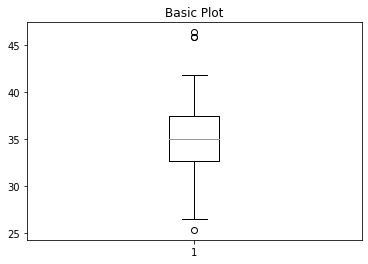

In [276]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(a)

In [284]:
import requests
resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
print(resp.encoding)
with open ('NiftyList.txt', 'w', encoding="utf-8") as f:
    f.write(resp.text)

UTF-8


In [339]:
from bs4 import BeautifulSoup
a = 'https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B8%D1%86%D0%B0'

In [340]:
soup


<!DOCTYPE html>
<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><link href="https://static.tacdn.com/favicon.ico?v2" id="favicon" rel="icon" type="image/x-icon"/><link color="#000000" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" rel="mask-icon" sizes="any"/><meta content="#34e0a1" name="theme-color"/><meta content="telephone=no" name="format-detection"/><script type="text/javascript">window.taRollupsAreAsync = true;</script><link crossorigin="" href="https://static.tacdn.com/css2/webfonts/TripSans/TripSans.css?v1.002" rel="stylesheet"/><title>AUGUSTINER SCHUTZENGARTEN, Munich - Restaurant Reviews, Photos &amp; Phone Number - Tripadvisor</title><meta content="TripAdvisor" property="al:ios:app_name"/><meta content="284876795" property="al:ios:app_store_id"/><meta content="284876795" name="twitter:app:id:ipad" property="twitter:app:id:ipad"/><meta content="284876

In [394]:
#парсинг заполнение ценового диапазона.  
from bs4 import BeautifulSoup
a = 'https://www.tripadvisor.com' + restaurants['URL_TA'][90]
r = requests.get(a)
print(r)
soup = BeautifulSoup(r.text)

#with open('test.txt', 'w', encoding = "utf-8") as output_file:
#    output_file.write(r.text)
  
c = soup.select("._15QfMZ2L")[1].string
c = c.replace(" ", "%20")

mel = 'https://www.google.com/maps/search/' + c
mel

<Response [200]>


'https://www.google.com/maps/search/8%20rue%20Saint%20Jerome,%2069007%20Lyon%20France'

In [381]:
https://www.google.ru/maps/search/8%20Rue%20Saint-J%C3%A9r%C3%B4me,%2069007%20Lyon

'https://www.google.com/maps/search/8 rue Saint Jerome, 69007 Lyon France'

In [406]:
r = requests.get('https://www.google.com/maps/search/8%20Rue%20Saint-J%C3%A9r%C3%B4me,%2069007%20Lyon')
print(r)
soup = BeautifulSoup(r.text)
soup
g = soup.find_all("meta", property="og:image")
print(g)
str(g).split('?center=')[1].split('&amp')[0].split('%2C')

<Response [200]>
[<meta content="https://maps.google.com/maps/api/staticmap?center=45.7500685%2C4.8442514&amp;zoom=17&amp;size=256x256&amp;language=en&amp;sensor=false&amp;client=google-maps-frontend&amp;signature=ByxWyMw4RZnLKd7LCwAJlSdM_pM" property="og:image"/>]


['45.7500685', '4.8442514']

In [420]:
restaurants = pd.read_csv('main_task.csv')
restaurants['Price Range'] = restaurants['Price Range'].fillna(0)
restaurants['Cuisine Style'] = restaurants['Cuisine Style'].fillna(0)
restaurants[(restaurants['Price Range'] == 0) | (restaurants['Cuisine Style'] == 0)].head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
1,id_1535,Stockholm,0,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
3,id_3456,Berlin,0,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
5,id_1418,Oporto,0,1419.0,3.0,0,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
7,id_825,Bratislava,['Italian'],826.0,3.0,0,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,0,2692.0,4.0,0,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
10,id_6578,Barcelona,0,6579.0,3.0,0,6.0,"[[], []]",/Restaurant_Review-g187497-d10696479-Reviews-R...,d10696479
16,id_5257,Berlin,"['Japanese', 'Asian', 'Thai', 'Vietnamese']",5259.0,4.0,0,3.0,"[['This is a real hidden Sushi-gem'], ['04/12/...",/Restaurant_Review-g187323-d10266473-Reviews-A...,d10266473
21,id_5844,Madrid,0,5847.0,4.0,0,NaN,"[[], []]",/Restaurant_Review-g187514-d10058810-Reviews-B...,d10058810
26,id_2763,Madrid,0,2765.0,5.0,0,11.0,"[['Heavenly meat slices and craft beer too.'],...",/Restaurant_Review-g187514-d10060659-Reviews-G...,d10060659
27,id_2108,Budapest,0,2109.0,3.5,0,2.0,"[['Good value canteen lunch stop.'], ['01/26/2...",/Restaurant_Review-g274887-d11616946-Reviews-P...,d11616946


In [465]:
def parcing_fill(price_range, cuisine_style, url):
    ''''''
    if price_range == 0:
        full_url = 'https://www.tripadvisor.com' + str(url)
        r = requests.get(full_url)
        print(r)
        soup = BeautifulSoup(r.text)
        fill_data_raw = soup.select("._2mn01bsa")
        if len(fill_data_raw) != 0:
            fill_data = list(map(lambda x: x.string, fill_data_raw))
            return fill_data
        else:
            return 0
    else:
        return 0
        
    

In [466]:
d = restaurants.head(20)
d['raw_column'] = d.apply(lambda x: parcing_fill(x['Price Range'], x['Cuisine Style'], x['URL_TA']), axis=1)
d

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


C:\Users\320071926\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,raw_column
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0
1,id_1535,Stockholm,0,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[$$ - $$$, Asian, Nepali]"
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0
3,id_3456,Berlin,0,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0
5,id_1418,Oporto,0,1419.0,3.0,0,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,"[$$ - $$$, Bar, European, Portuguese]"
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504,0
7,id_825,Bratislava,['Italian'],826.0,3.0,0,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765,[Italian]
8,id_2690,Vienna,0,2692.0,4.0,0,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029,"[Cafe, European]"
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681,0


In [467]:
type(d['raw_column'][7])

list

In [468]:
def price_fill(price_range,new_column):
    ''''''
    if type(price_range) == int:
        if new_column != 0:
            if '$' in new_column[0]:
                return new_column[0]
            else:
                return None
        return None
    else:
        return price_range
    
    

def cuisine_fill(cuisine,new_column):
    if type(cuisine) == int:
        if new_column != 0:
            if '$' in new_column[0] and len(new_column) > 1:
                return new_column[1:]
            elif '$' in new_column[0] and len(new_column) == 1:
                return None
            else:
                if len(new_column) > 0:
                    return new_column
                else:
                    return None
        else:
            return None
    else:
        return cuisine

In [469]:
d['price_new'] = d.apply(lambda x: price_fill(x['Price Range'], x['raw_column']), axis=1)
d

C:\Users\320071926\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,raw_column,price_new
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,$$ - $$$
1,id_1535,Stockholm,0,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[$$ - $$$, Asian, Nepali]",$$ - $$$
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,$$$$
3,id_3456,Berlin,0,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,None
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,$$ - $$$
5,id_1418,Oporto,0,1419.0,3.0,0,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,"[$$ - $$$, Bar, European, Portuguese]",$$ - $$$
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504,0,$
7,id_825,Bratislava,['Italian'],826.0,3.0,0,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765,[Italian],None
8,id_2690,Vienna,0,2692.0,4.0,0,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029,"[Cafe, European]",None
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681,0,$


In [470]:
d['cuisine_new'] = d.apply(lambda x: cuisine_fill(x['Cuisine Style'], x['raw_column']), axis=1)
d

C:\Users\320071926\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,raw_column,price_new,cuisine_new
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,$$ - $$$,"['European', 'French', 'International']"
1,id_1535,Stockholm,0,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,"[$$ - $$$, Asian, Nepali]",$$ - $$$,"[Asian, Nepali]"
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,$$$$,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget..."
3,id_3456,Berlin,0,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,None,None
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,$$ - $$$,"['German', 'Central European', 'Vegetarian Fri..."
5,id_1418,Oporto,0,1419.0,3.0,0,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,"[$$ - $$$, Bar, European, Portuguese]",$$ - $$$,"[Bar, European, Portuguese]"
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504,0,$,"['Italian', 'Pizza']"
7,id_825,Bratislava,['Italian'],826.0,3.0,0,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765,[Italian],None,['Italian']
8,id_2690,Vienna,0,2692.0,4.0,0,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029,"[Cafe, European]",None,"[Cafe, European]"
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681,0,$,"['Italian', 'Pizza', 'Fast Food']"


In [471]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      20 non-null     object 
 1   City               20 non-null     object 
 2   Cuisine Style      20 non-null     object 
 3   Ranking            20 non-null     float64
 4   Rating             20 non-null     float64
 5   Price Range        20 non-null     object 
 6   Number of Reviews  19 non-null     float64
 7   Reviews            20 non-null     object 
 8   URL_TA             20 non-null     object 
 9   ID_TA              20 non-null     object 
 10  raw_column         20 non-null     object 
 11  price_new          16 non-null     object 
 12  cuisine_new        19 non-null     object 
dtypes: float64(3), object(10)
memory usage: 2.2+ KB


In [472]:
d.price_new.value_counts()

$$ - $$$    12
$            3
$$$$         1
Name: price_new, dtype: int64

In [474]:
from multiprocessing import Pool
import numpy as np
 
# для примера возьмем функцию суммы по строке, приведенную выше
def calculate_sum_column(df):
    df['sum_column'] = df.apply(lambda row: row['col1'] + row['col2'], axis=1)
    return df
 
# в данном примере расспараллеливаем на восемь потоков. Будьте аккуратны - при распараллеливании тратится больше оперативной памяти
def parallelize_dataframe(df, func):
    a,b,c,d,e,f,g,h = np.array_split(df, 8)
    pool = Pool(8)
    some_res = pool.map(func, [a,b,c,d,e,f,g,h])
    df = pd.concat(some_res)
    pool.close()
    pool.join()
    return df
 
# имитация большого датасета
df = pd.concat([df, df, df], ignore_index=True)
 
df = parallelize_dataframe(df, calculate_sum_column)
print(df.head(10))

NameError: name 'df' is not defined

In [475]:
df = pd.read_csv('main_task.csv')
# данные в последствии будут наполняться и обогащаться парсингом сайта trip_advisor 
# поэтому для ускорения после этого шага, данные сохраняться в новый файл и проще будет скачать его
df.head(10)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


In [490]:
# работа с городом

df['capital'] = df.City.apply(lambda x: capital(x))
df['raw_col'] = df.City.apply(lambda x: country_data(x))
df['happines'] = df.raw_col.apply(lambda x: x[1])
df['untwo'] = df.raw_col.apply(lambda x: x[2])
df['gdp'] = df.raw_col.apply(lambda x: x[3])


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,capital,raw_line,raw_col,happines,untwo,gdp
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1,"(France, 6.442, 82700)","(France, 6.442, 82700, 48261)",6.442,82700.0,48261
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,"(Sweden, 7.314, 6559)","(Sweden, 7.314, 6559, 54130)",7.314,6559.0,54130
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,"(UK, 6.714, 35814)","(UK, 6.714, 35814, 47439)",6.714,35814.0,47439
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,"(Germany, 6.951, 35595)","(Germany, 6.951, 35595, 55059)",6.951,35595.0,55059
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,"(Germany, 6.951, 35595)","(Germany, 6.951, 35595, 55059)",6.951,35595.0,55059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,"(Italy, 6.0, 52372)","(Italy, 6.0, 52372, 43167)",6.000,52372.0,43167
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,"(France, 6.442, 82700)","(France, 6.442, 82700, 48261)",6.442,82700.0,48261
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,"(Sweden, 7.314, 6559)","(Sweden, 7.314, 6559, 54130)",7.314,6559.0,54130
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,"(Poland, 5.973, 17463)","(Poland, 5.973, 17463, 32527)",5.973,17463.0,32527


In [521]:
def vegan(cusine_list):
    '''функция создания признака - есть ли еда для веганов'''
    
    if ('VegetarianFriendly' in cusine_list) | ('VeganOptions' in cusine_list):
        return 1
    else:
        return 0
    
def healthy(cusine_list):
    '''функция создания признака - есть ли еда для веганов'''
    
    if ('GlutenFreeOptions' in cusine_list) | ('Healthy' in cusine_list):
        return 1
    else:
        return 0

def alcohol(cusine_list):
    '''функция создания признака - есть ли еда для веганов'''
    
    if ('Bar' in cusine_list) | ('Pub' in cusine_list) | ('WineBar' in cusine_list) | ('BrewPub' in cusine_list):
        return 1
    else:
        return 0


def fastfood(cusine_list):
    '''функция создания признака - есть ли еда для веганов'''
    
    if ('FastFood' in cusine_list) | ('StreetFood' in cusine_list):
        return 1
    else:
        return 0
        
        
        
        



In [492]:
#new - ranking отнормированный
City_list = df['City'].unique()
#list(b).index('Paris')

Max_num_rest_list = list(map(lambda x: df[df.City == x]['Ranking'].max(), City_list))
#a[list(b).index('Paris')]

df['max_num_rest'] = df['City'].apply(lambda x: Max_num_rest_list[list(City_list).index(x)])
df['new_ranking'] = df['Ranking']/restaurants['max_num_rest']*1000
df


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,capital,raw_line,raw_col,happines,untwo,gdp,max_num_rest,new_ranking
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1,"(France, 6.442, 82700)","(France, 6.442, 82700, 48261)",6.442,82700.0,48261,13986.0,398.255398
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,"(Sweden, 7.314, 6559)","(Sweden, 7.314, 6559, 54130)",7.314,6559.0,54130,2464.0,623.782468
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,"(UK, 6.714, 35814)","(UK, 6.714, 35814, 47439)",6.714,35814.0,47439,16444.0,21.466796
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,"(Germany, 6.951, 35595)","(Germany, 6.951, 35595, 55059)",6.951,35595.0,55059,6372.0,542.686755
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,"(Germany, 6.951, 35595)","(Germany, 6.951, 35595, 55059)",6.951,35595.0,55059,2763.0,224.755700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,"(Italy, 6.0, 52372)","(Italy, 6.0, 52372, 43167)",6.000,52372.0,43167,6275.0,79.681275
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,"(France, 6.442, 82700)","(France, 6.442, 82700, 48261)",6.442,82700.0,48261,13986.0,453.381953
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,"(Sweden, 7.314, 6559)","(Sweden, 7.314, 6559, 54130)",7.314,6559.0,54130,2464.0,670.454545
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,"(Poland, 5.973, 17463)","(Poland, 5.973, 17463, 32527)",5.973,17463.0,32527,2141.0,299.392807


In [493]:
df['ID_TA'] = df['ID_TA'].apply(lambda x: int(x[1:]))
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,capital,raw_line,raw_col,happines,untwo,gdp,max_num_rest,new_ranking
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,1912643,1,"(France, 6.442, 82700)","(France, 6.442, 82700, 48261)",6.442,82700.0,48261,13986.0,398.255398
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,7992032,1,"(Sweden, 7.314, 6559)","(Sweden, 7.314, 6559, 54130)",7.314,6559.0,54130,2464.0,623.782468
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,8632781,1,"(UK, 6.714, 35814)","(UK, 6.714, 35814, 47439)",6.714,35814.0,47439,16444.0,21.466796
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,1358776,1,"(Germany, 6.951, 35595)","(Germany, 6.951, 35595, 55059)",6.951,35595.0,55059,6372.0,542.686755
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,6864963,0,"(Germany, 6.951, 35595)","(Germany, 6.951, 35595, 55059)",6.951,35595.0,55059,2763.0,224.755700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,2104414,0,"(Italy, 6.0, 52372)","(Italy, 6.0, 52372, 43167)",6.000,52372.0,43167,6275.0,79.681275
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,1800036,1,"(France, 6.442, 82700)","(France, 6.442, 82700, 48261)",6.442,82700.0,48261,13986.0,453.381953
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,947615,1,"(Sweden, 7.314, 6559)","(Sweden, 7.314, 6559, 54130)",7.314,6559.0,54130,2464.0,670.454545
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,1100838,1,"(Poland, 5.973, 17463)","(Poland, 5.973, 17463, 32527)",5.973,17463.0,32527,2141.0,299.392807


In [517]:
def vegan(cusine_list):
    '''функция создания признака - есть ли еда для веганов'''
    
    if ('VegetarianFriendly' in cusine_list) | ('VeganOptions' in cusine_list):
        return 1
    else:
        return 0
    
def cousine_corr(string):
    '''Функция предназначена для перевода строковой переменной с несколькими кухнями в тип 
    list для дальнейего применения explode например'''

    #if str(string) == 'nan':
        #return None
    
        a = str(string).split(',')
        a = list(map(lambda x: x.replace("'", ""), a))
        a = list(map(lambda x: x.replace("[", ""), a))
        a = list(map(lambda x: x.replace("]", ""), a))
        a = list(map(lambda x: x.replace(" ", ""), a))
    return a


IndentationError: unexpected indent (<ipython-input-517-4d7e6dba56fd>, line 16)

In [518]:
#сначала для дальнейшего удобства в столбце Cousine style сделаем список а не строку

df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: cousine_corr(x))
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,vegan
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0
1,id_1535,Stockholm,[None],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1
3,id_3456,Berlin,[None],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1
...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1
39996,id_6340,Paris,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0
39998,id_640,Warsaw,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1


In [524]:
df['vegan'] = df['Cuisine Style'].apply(lambda x: vegan(x))
df['healthy'] = df['Cuisine Style'].apply(lambda x: healthy(x))
df['alcohol'] = df['Cuisine Style'].apply(lambda x: alcohol(x))
df['fastfood'] = df['Cuisine Style'].apply(lambda x: fastfood(x))
df['cuisine_difference'] = df['Cuisine Style'].apply(lambda x: len(x))
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,vegan,healthy,alcohol,fastfood,cuisine_difference
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,3
1,id_1535,Stockholm,[None],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,1
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,1,0,0,7
3,id_3456,Berlin,[None],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,0,1
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,1,0,0,4
39996,id_6340,Paris,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,0,1,0,5
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,2
39998,id_640,Warsaw,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,0,0,0,5


In [567]:
b = df['Reviews'][1]
b

"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]"

In [532]:
import re

In [558]:
pattern = "\d+\/\d+\/\d+"
 
a = re.findall(pattern, b)
a


'06/19/2016'

In [574]:
a1 = pd.to_datetime(a[1])
a2 = pd.to_datetime(a[0])

a2 > a1

True

In [572]:
(a2-a1).days

382

TypeError: expected string or bytes-like object

In [616]:
def data_eject(x):
    pattern = "\d+\/\d+\/\d+"
    return re.findall(pattern, x)

def last_comment(x):
    if len(x) == 2:
        if pd.to_datetime(x[0]) > pd.to_datetime(x[1]):
            return pd.to_datetime(x[0])
        else:
            return pd.to_datetime(x[1])
    elif len(x) == 1:
        return pd.to_datetime(x[0])
    else:
        return None
    
def date_diff(x):
    if len(x) == 2:
        if pd.to_datetime(x[0]) > pd.to_datetime(x[1]):
            return (pd.to_datetime(x[0])-pd.to_datetime(x[1])).days
        else:
            return (pd.to_datetime(x[1])-pd.to_datetime(x[0])).days
    else:
        return None

df['dates'] = df['Reviews'].apply(lambda x: data_eject(x))
df['last_date'] = df['dates'].apply(lambda x: last_comment(x))
df['date_diff'] = (df['last_date'].max() - df['last_date']).dt.days

In [617]:
df['date_diff'].max()

5059.0

In [618]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,vegan,healthy,alcohol,fastfood,cuisine_difference,dates,last_date,date_diff
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,3,"[12/31/2017, 11/20/2017]",2017-12-31,57.0
1,id_1535,Stockholm,[None],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,1,"[07/06/2017, 06/19/2016]",2017-07-06,235.0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,1,0,0,7,"[01/08/2018, 01/06/2018]",2018-01-08,49.0
3,id_3456,Berlin,[None],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,0,1,[],NaT,NaN
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,0,0,0,3,"[11/18/2017, 02/19/2017]",2017-11-18,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,1,0,0,4,"[12/16/2017, 11/12/2017]",2017-12-16,72.0
39996,id_6340,Paris,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,0,1,0,5,"[12/21/2017, 12/12/2017]",2017-12-21,67.0
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,2,"[11/03/2016, 04/12/2008]",2016-11-03,480.0
39998,id_640,Warsaw,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,0,0,0,5,"[07/11/2017, 06/18/2017]",2017-07-11,230.0


In [624]:
1000/18*2/60

1.8518518518518519

21.666666666666668

<Response [200]>


<!DOCTYPE html>
<html lang="ru"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>лондон - Поиск в Google</title><script nonce="7m7SmRyCPDTuv2sEngfo/A==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var
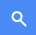
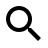
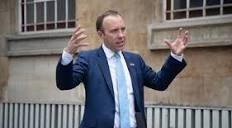
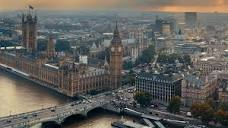
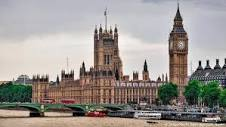

In [692]:
a = 'https://www.google.com/search?gs_ssp=eJzj4tDP1TcwySrIMWD04rmw-8K-C3svbAGRAHdBDFQ&q=%D0%BB%D0%BE%D0%BD%D0%B4%D0%BE%D0%BD&rlz=1C1GCEB_enRU860RU860&oq=Ljyljy&aqs=chrome.1.69i57j46i10i433j0i10i433j0i10j46i10i131i433j46i10j46i10i433.3767j0j7&sourceid=chrome&ie=UTF-8'
r = requests.get(a)
print(r)
soup = BeautifulSoup(r.text)
soup

In [695]:
fill_data_raw = soup.select(".RWuggc kCrYT")
fill_data_raw


[]

In [668]:

pattern = "\d"
 
a = re.findall(pattern, str(fill_data_raw[5]))
type(a[0])summa = ''
for i in range (0, len(a)):
    summa = summa + a[i]
int(summa)


2148271

{"message":"You are not subscribed to this API."}


In [681]:
city_db = pd.read_csv('worldcitiespop.csv')

In [683]:
city_db.head()

,Country;City;AccentCity;Region;Population;Latitude;Longitude;geopoint
br;sitio edson goncalves;Sítio Edson Gonçalves;18;;-23.2358;-50.1495;-23.2358,-50.149500
br;sitio entre rios;Sítio Entre Rios;18;;-25.411995;-48.877143;-25.411995,-48.877143
br;sitio eraldo ferreira;Sítio Eraldo Ferreira;26;;-26.1926;-49.7998;-26.1926,-49.799800
br;sitio ermelino de souza;Sítio Ermelino de Souza;18;;-23.918347;-50.39897;-23.918347,-50.398970
br;sitio ernesto a. ferreira;Sítio Ernesto A. Ferreira;18;;-25.9252;-49.383;-25.9252,-49.383000
